# I. Data Preprocessing

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline


## 1. Load Dataset

In [2]:
# Load Dataset

file_path = '/kaggle/input/final-dataset-mos/final_dataset_mos.csv'

airbnb_data = pd.read_csv(file_path)

In [3]:
airbnb_data.head()

,picture_url,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,...,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,distance_to_center,beds_per_bedroom,amenity_count,image_downloaded,mos
0,https://a0.muscache.com/pictures/9f6903b4-5c72...,4,1.0,2.0,3.0,81.0,30,90,0,288,...,False,True,False,False,False,12.723651,1.5,50,True,6.269592
1,https://a0.muscache.com/pictures/5240c98f-566c...,2,1.0,1.0,1.0,65.0,30,1125,0,0,...,False,False,True,False,False,5.985175,1.0,9,True,6.325552
2,https://a0.muscache.com/pictures/87437b63-3e2e...,6,2.0,3.0,3.0,189.0,30,1125,30,180,...,False,False,False,True,False,18.785360,1.0,40,True,5.717279
3,https://a0.muscache.com/pictures/9ab3e9f5-9ee4...,1,1.0,1.0,1.0,45.0,31,1125,11,71,...,False,False,False,False,True,10.737836,1.0,37,True,6.564707
4,https://a0.muscache.com/pictures/29f9742f-ce66...,2,1.0,1.0,1.0,26.0,30,1125,0,0,...,False,True,False,False,False,9.051426,1.0,17,True,6.695259


## 2. General Statistics


In [4]:
airbnb_data.describe(include='all')

,picture_url,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,...,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,distance_to_center,beds_per_bedroom,amenity_count,image_downloaded,mos
count,6247,6247.000000,6239.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,...,6247,6247,6247,6247,6247,6247.000000,6247.000000,6247.000000,6247,6247.000000
unique,6216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,NaN,NaN,NaN,1,NaN
top,https://a0.muscache.com/pictures/6998e77e-4564...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,NaN,NaN,NaN,True,NaN
freq,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5997,3849,3775,5180,6187,NaN,NaN,NaN,6247,NaN
mean,NaN,2.896430,1.151306,1.425324,1.664959,201.099248,30.918841,613.907636,10.246038,144.664639,...,NaN,NaN,NaN,NaN,NaN,8.371440,1.201131,25.890347,NaN,6.444043
std,NaN,2.040182,0.461254,0.827106,1.141436,580.634224,35.040770,480.102034,12.638277,146.609272,...,NaN,NaN,NaN,NaN,NaN,5.045472,0.510853,15.625479,NaN,0.680573
min,NaN,1.000000,0.000000,1.000000,1.000000,10.000000,1.000000,2.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.095463,0.166667,0.000000,NaN,4.192937
25%,NaN,2.000000,1.000000,1.000000,1.000000,74.000000,30.000000,120.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,4.843837,1.000000,13.000000,NaN,5.994647
50%,NaN,2.000000,1.000000,1.000000,1.000000,120.000000,30.000000,365.000000,1.000000,90.000000,...,NaN,NaN,NaN,NaN,NaN,7.352482,1.000000,23.000000,NaN,6.405189
75%,NaN,4.000000,1.000000,2.000000,2.000000,200.000000,30.000000,1125.000000,26.000000,306.000000,...,NaN,NaN,NaN,NaN,NaN,10.927589,1.000000,37.000000,NaN,6.846205


## 3. Filter outliers

In [5]:
# Bước 1: Tính toán IQR (Interquartile Range)

Q1 = airbnb_data['price'].quantile(0.25)  # Phân vị thứ nhất

Q3 = airbnb_data['price'].quantile(0.75)  # Phân vị thứ ba

IQR = Q3 - Q1



# Xác định ngưỡng

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR



# Bước 2: Lọc bỏ giá trị ngoại lai

filtered_data = airbnb_data[(airbnb_data['price'] >= lower_bound) & (airbnb_data['price'] <= upper_bound)]



# Bước 3: So sánh số lượng trước và sau khi loại bỏ ngoại lai

print(f"Số lượng ban đầu: {len(airbnb_data)}")

print(f"Số lượng sau khi loại bỏ ngoại lai: {len(filtered_data)}")



# Cập nhật DataFrame

airbnb_data = filtered_data

Số lượng ban đầu: 6247
Số lượng sau khi loại bỏ ngoại lai: 5696


## 4. Missing Values


In [6]:
airbnb_data.isnull().sum()

picture_url                          0
accommodates                         0
bathrooms                            8
bedrooms                             0
beds                                 0
price                                0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_365                     0
room_type_Entire home/apt            0
room_type_Other                      0
room_type_Private room               0
neighbourhood_group_Bronx            0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
distance_to_center                   0
beds_per_bedroom                     0
amenity_count                        0
image_downloaded                     0
mos                                  0
dtype: int64

In [7]:
# Loại bỏ các hàng có giá trị null
airbnb_data = airbnb_data.dropna()

# Xác nhận số lượng hàng sau khi loại bỏ
print(f"Số lượng hàng sau khi loại bỏ giá trị null: {len(airbnb_data)}")

Số lượng hàng sau khi loại bỏ giá trị null: 5688


## 5. Delete Unused Columns

In [8]:
airbnb_data_1 = airbnb_data

columns_to_drop = ['picture_url', 'image_downloaded']

airbnb_data = airbnb_data.drop(columns=columns_to_drop)

# II. Data Exploration

## 1. Distribution of Target Variable (Price)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


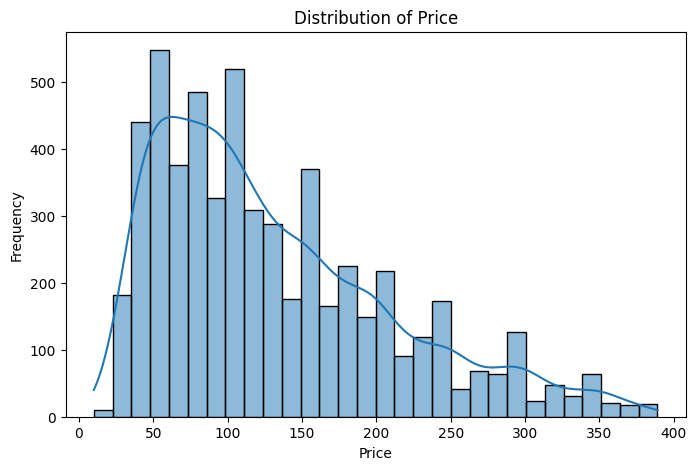

In [9]:
plt.figure(figsize=(8, 5))

sns.histplot(airbnb_data['price'], kde=True, bins=30)

plt.title('Distribution of Price')

plt.xlabel('Price')

plt.ylabel('Frequency')

plt.show()

## 2. Scatter Plots with Price

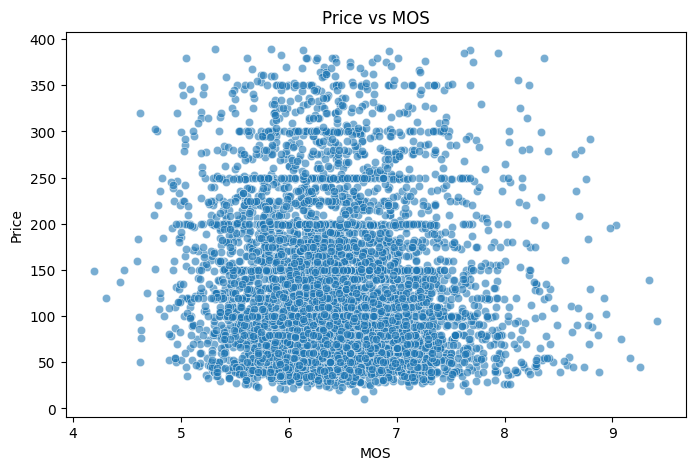

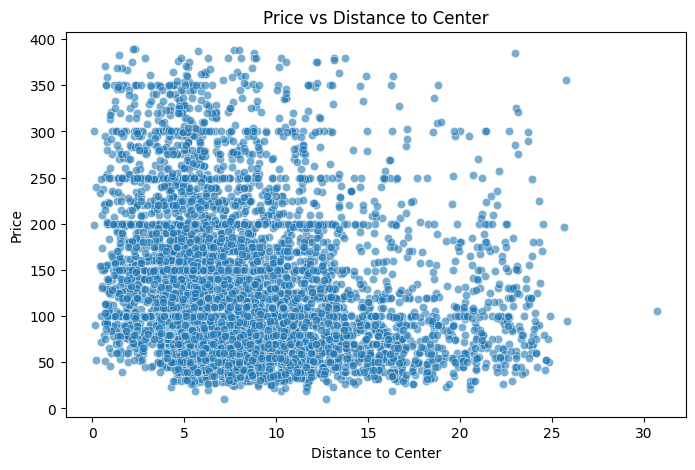

In [10]:
# Price vs MOS

plt.figure(figsize=(8, 5))

sns.scatterplot(x='mos', y='price', data=airbnb_data, alpha=0.6)

plt.title('Price vs MOS')

plt.xlabel('MOS')

plt.ylabel('Price')

plt.show()



# Price vs Distance to Center

plt.figure(figsize=(8, 5))

sns.scatterplot(x='distance_to_center', y='price', data=airbnb_data, alpha=0.6)

plt.title('Price vs Distance to Center')

plt.xlabel('Distance to Center')

plt.ylabel('Price')

plt.show()

## 3. Categorical Analysis with Price


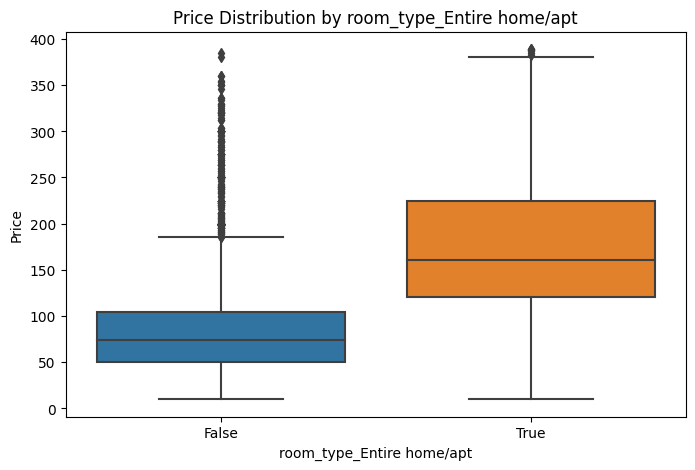

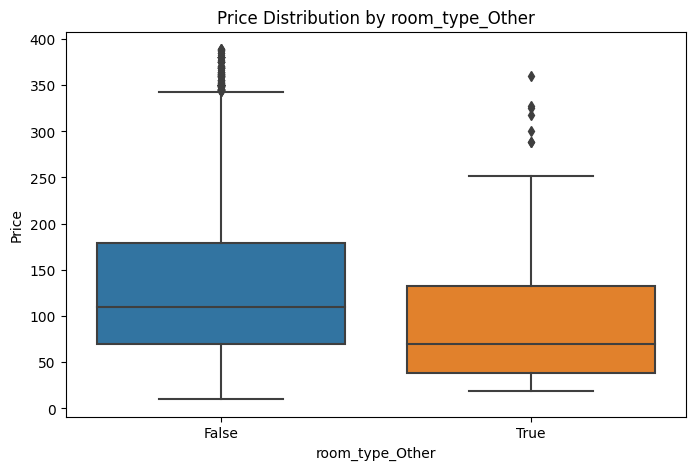

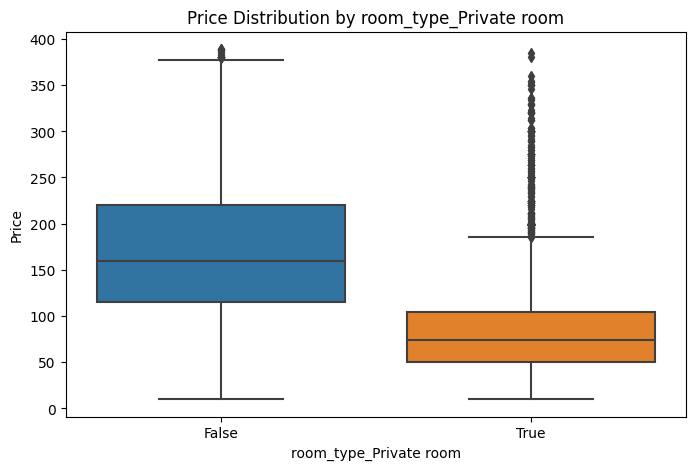

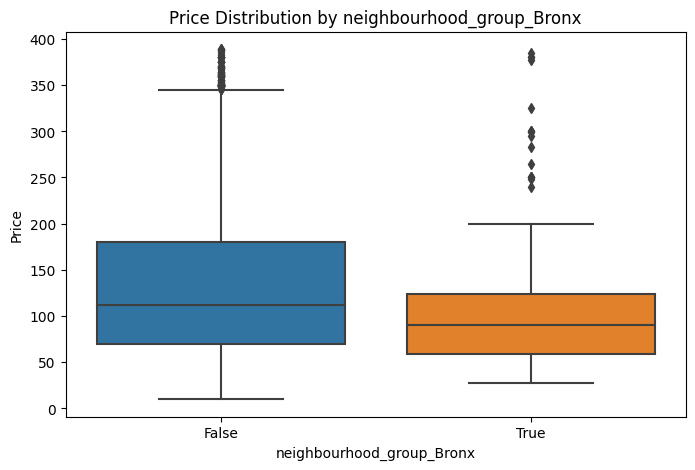

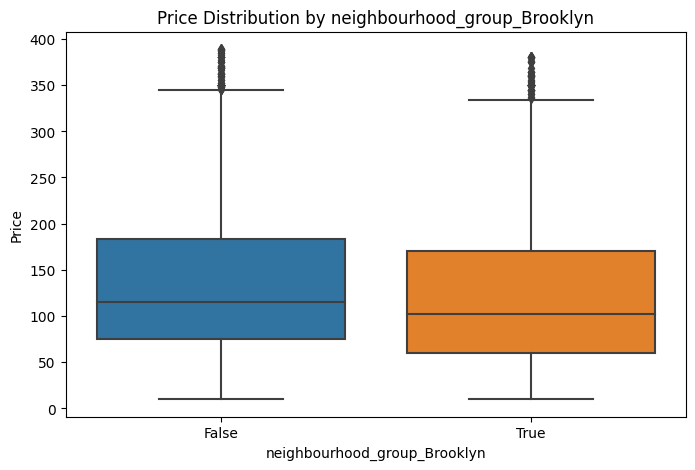

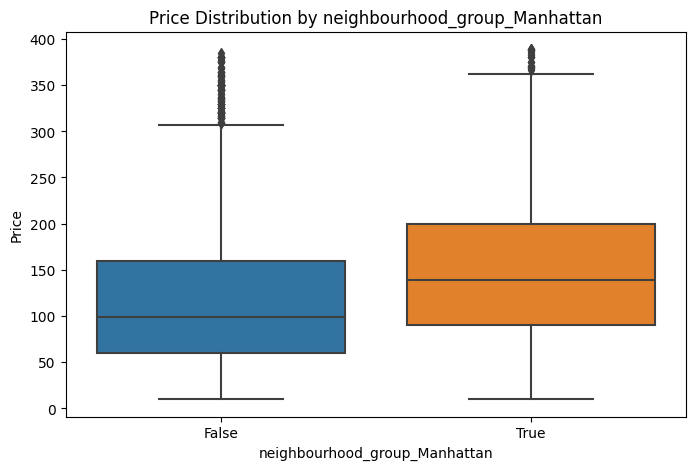

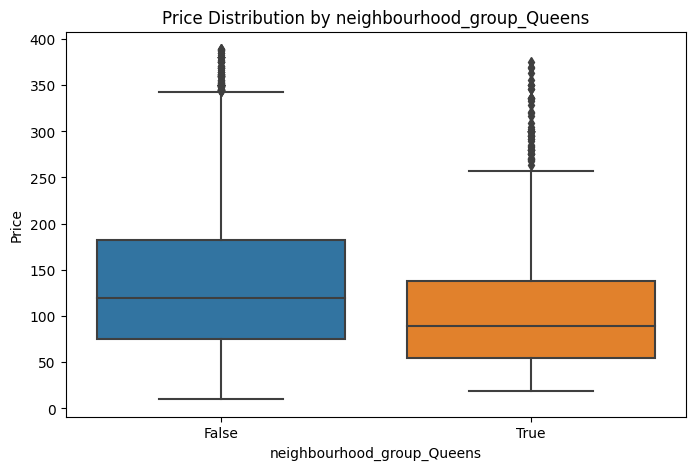

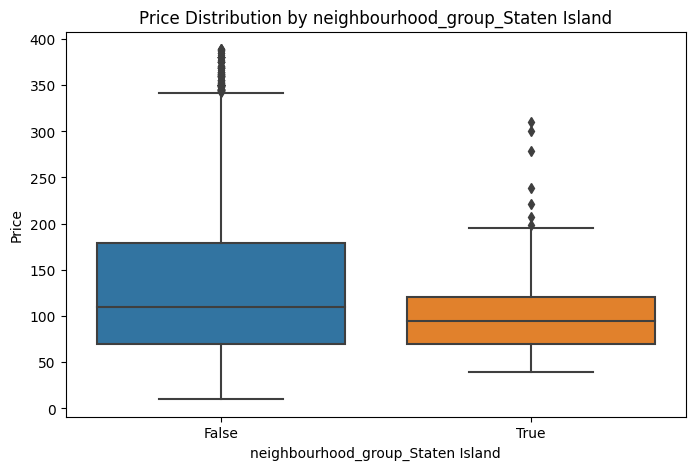

In [11]:
# Room Type vs Price

room_type_columns = [col for col in airbnb_data.columns if col.startswith('room_type_')]

for col in room_type_columns:

    plt.figure(figsize=(8, 5))

    sns.boxplot(x=airbnb_data[col], y=airbnb_data['price'])

    plt.title(f'Price Distribution by {col}')

    plt.xlabel(col)

    plt.ylabel('Price')

    plt.show()



# Neighborhood Group vs Price

neighborhood_columns = [col for col in airbnb_data.columns if col.startswith('neighbourhood_group_')]

for col in neighborhood_columns:

    plt.figure(figsize=(8, 5))

    sns.boxplot(x=airbnb_data[col], y=airbnb_data['price'])

    plt.title(f'Price Distribution by {col}')

    plt.xlabel(col)

    plt.ylabel('Price')

    plt.show()

## 4. Bathrooms and Bedrooms with Price


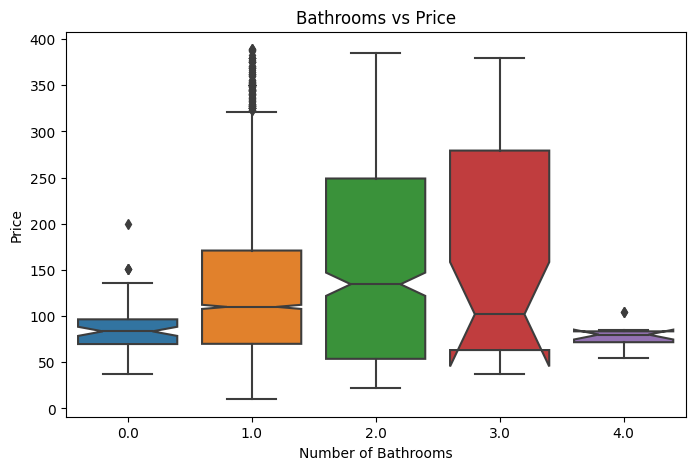

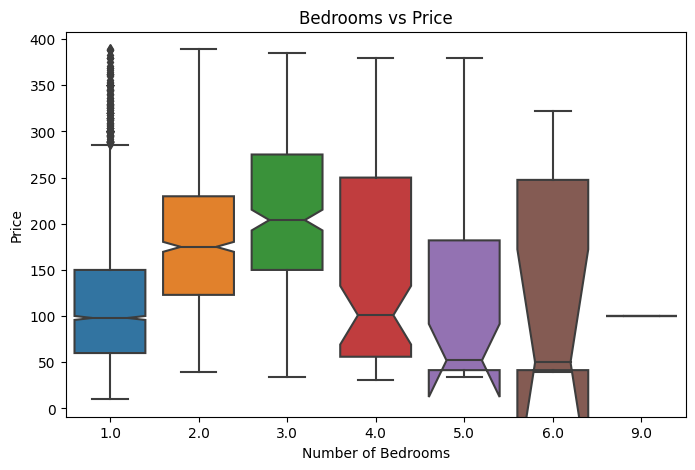

In [12]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='bathrooms', y='price', data=airbnb_data, notch=True)

plt.title('Bathrooms vs Price')

plt.xlabel('Number of Bathrooms')

plt.ylabel('Price')

plt.show()



plt.figure(figsize=(8, 5))

sns.boxplot(x='bedrooms', y='price', data=airbnb_data, notch=True)

plt.title('Bedrooms vs Price')

plt.xlabel('Number of Bedrooms')

plt.ylabel('Price')

plt.show()


# II. Model & Evaluate 

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [14]:
airbnb_data.head()

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,room_type_Entire home/apt,...,room_type_Private room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,distance_to_center,beds_per_bedroom,amenity_count,mos
0,4,1.0,2.0,3.0,81.0,30,90,0,288,True,...,False,False,True,False,False,False,12.723651,1.5,50,6.269592
1,2,1.0,1.0,1.0,65.0,30,1125,0,0,False,...,False,False,False,True,False,False,5.985175,1.0,9,6.325552
2,6,2.0,3.0,3.0,189.0,30,1125,30,180,True,...,False,False,False,False,True,False,18.785360,1.0,40,5.717279
3,1,1.0,1.0,1.0,45.0,31,1125,11,71,False,...,True,False,False,False,False,True,10.737836,1.0,37,6.564707
4,2,1.0,1.0,1.0,26.0,30,1125,0,0,False,...,True,False,True,False,False,False,9.051426,1.0,17,6.695259


## 1. Define X and y

In [15]:
X = airbnb_data.drop(['price'], axis=1)  # 'price' là biến mục tiêu
y = airbnb_data['price']

## 2. Train & Evaluate Models

In [16]:

# Danh sách các mô hình
models = {
    'Dummy (mean)': DummyRegressor(strategy='mean'),
    'Dummy (median)': DummyRegressor(strategy='median'),
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(),
    'ANN': MLPRegressor(max_iter=500, random_state=42),
    'RF': RandomForestRegressor(random_state=42),
    'XGB': XGBRegressor(eval_metric='rmse')
}



# K-Fold Cross-Validation với k=5
kfold = KFold(n_splits=5, shuffle=True, random_state=1)


# Lưu kết quả
results = {
    'Mô hình': [],
    'MAE': [],
    'MAD': [],
    'MSE': [],
    '$R^2$ ngoài mẫu': []
}

In [17]:
# Đánh giá các mô hình
for name, model in models.items():
    mae_scores, mad_scores, mse_scores, r2_scores = [], [], [], []

    # K-Fold
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Huấn luyện mô hình
        model.fit(X_train, y_train)

        # Dự đoán trên tập thử nghiệm
        y_pred = model.predict(X_test)
        
        # Tính toán các chỉ số đánh giá
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        mad_scores.append(median_absolute_error(y_test, y_pred))
        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    # Lưu kết quả trung bình
    results['Mô hình'].append(name)
    results['MAE'].append(np.mean(mae_scores))
    results['MAD'].append(np.mean(mad_scores))
    results['MSE'].append(np.mean(mse_scores))
    results['$R^2$ ngoài mẫu'].append(np.mean(r2_scores))

## 3. Results


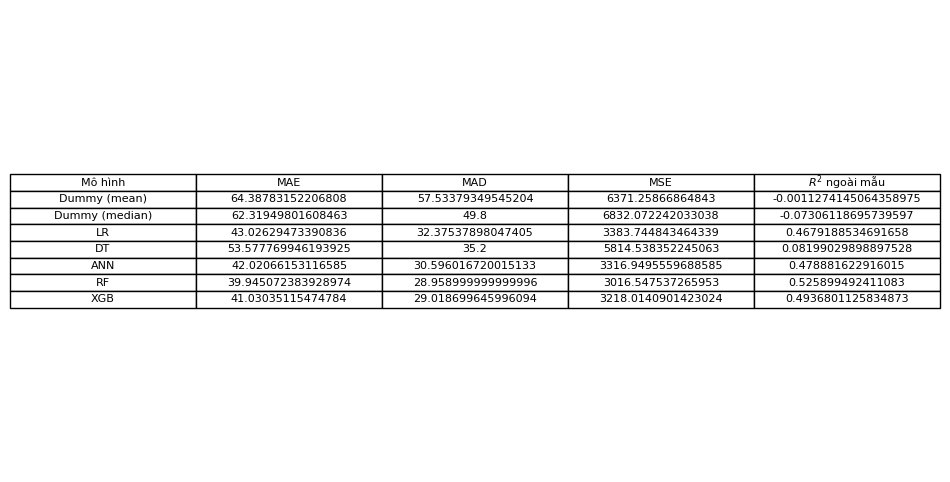

In [18]:
# Tạo DataFrame từ kết quả
df_results = pd.DataFrame(results)

# Hiển thị bảng với matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_results.values, colLabels=df_results.columns, cellLoc='center', loc='center')

# Hiển thị bảng
plt.show()

# III. Explain model

## 1. Global understanding

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5688 entries, 0 to 6246
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   accommodates                       5688 non-null   int64  
 1   bathrooms                          5688 non-null   float64
 2   bedrooms                           5688 non-null   float64
 3   beds                               5688 non-null   float64
 4   minimum_nights                     5688 non-null   int64  
 5   maximum_nights                     5688 non-null   int64  
 6   availability_30                    5688 non-null   int64  
 7   availability_365                   5688 non-null   int64  
 8   room_type_Entire home/apt          5688 non-null   bool   
 9   room_type_Other                    5688 non-null   bool   
 10  room_type_Private room             5688 non-null   bool   
 11  neighbourhood_group_Bronx          5688 non-null   bool   
 1

In [20]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1. Chuyển đổi các cột kiểu bool trong X thành int
X[X.select_dtypes(include='bool').columns] = X.select_dtypes(include='bool').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


model = xgb.XGBRegressor(
    eval_metric='rmse',
    use_label_encoder=False,
    random_state=1,
)
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

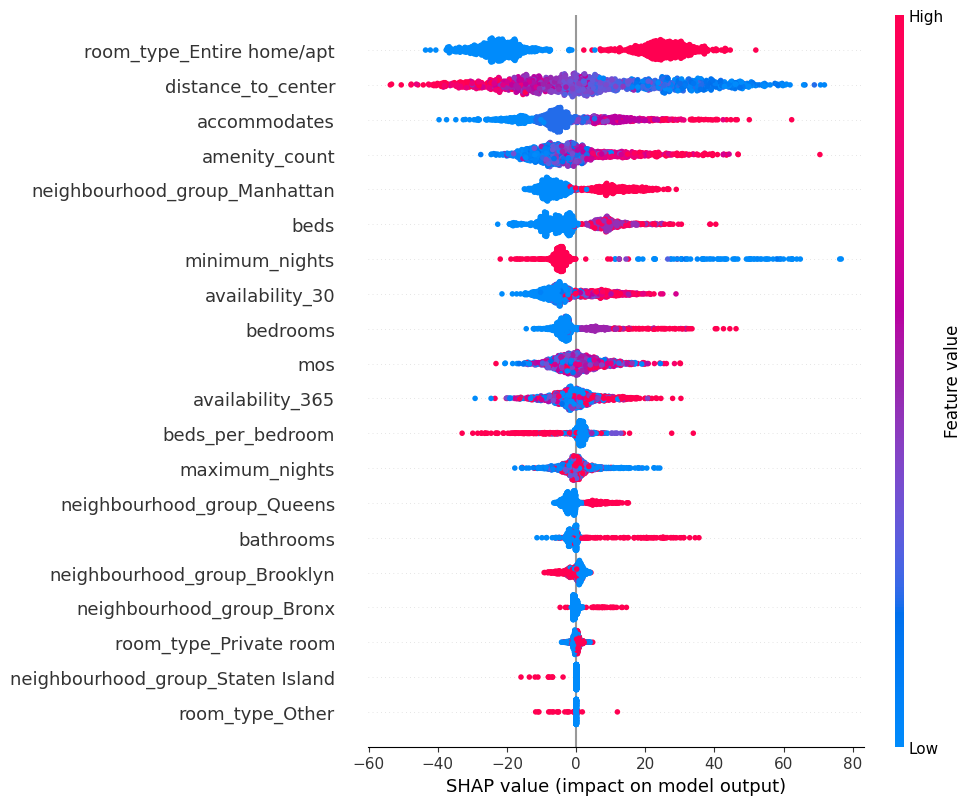

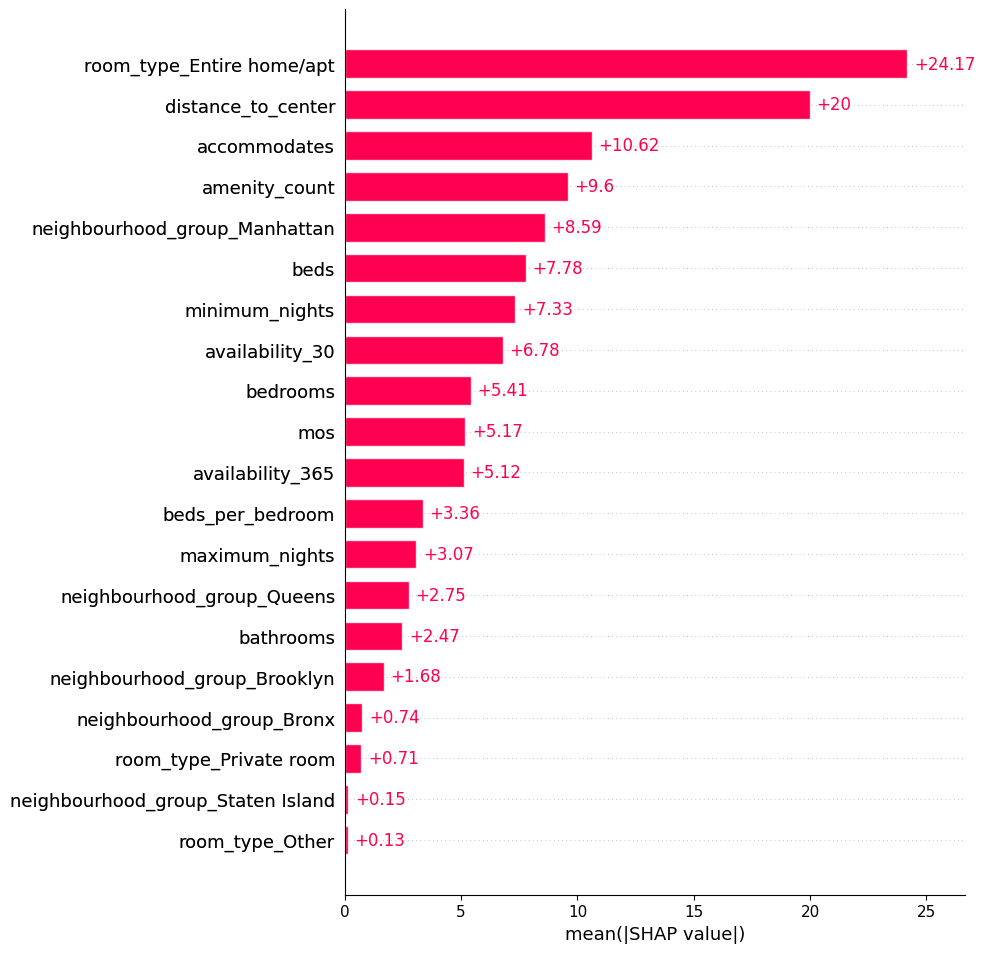

In [21]:
# 6. Vẽ biểu đồ SHAP (beeswarm plot) với tất cả các đặc trưng
shap.plots.beeswarm(shap_values, max_display=X.shape[1])

# 7. Vẽ biểu đồ độ quan trọng của đặc trưng (bar plot) với tất cả các đặc trưng
shap.plots.bar(shap_values, max_display=X.shape[1])

## 2. Local explanations¶


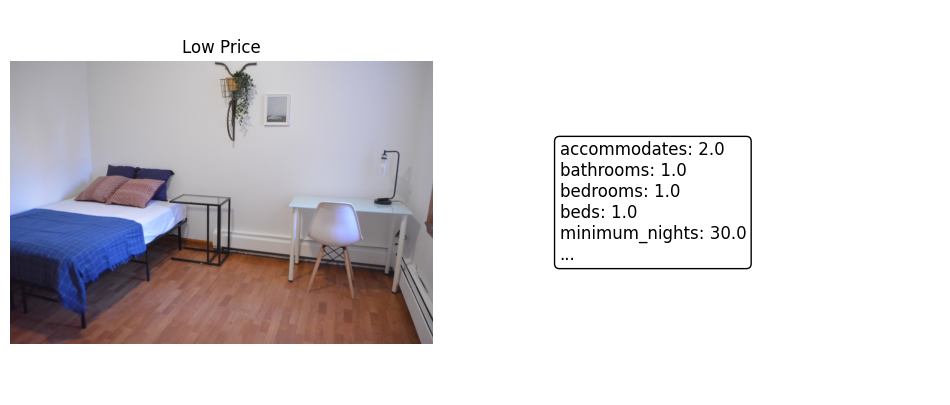

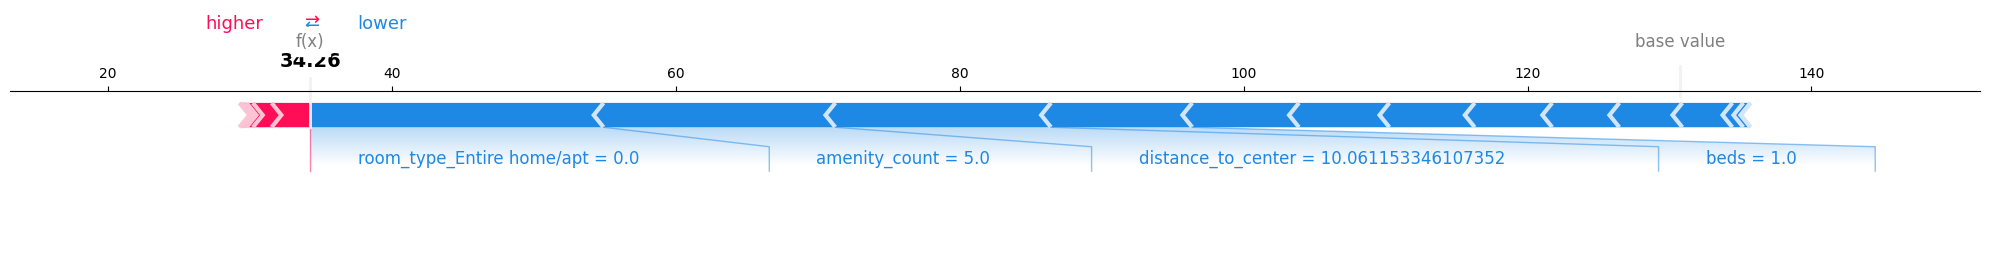

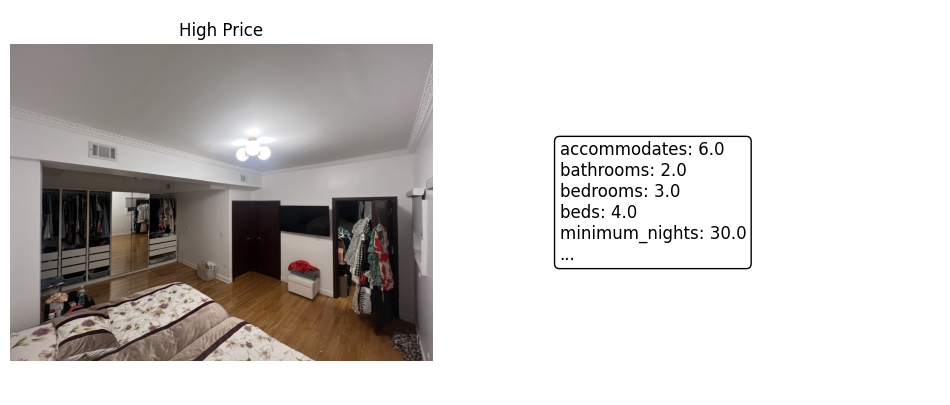

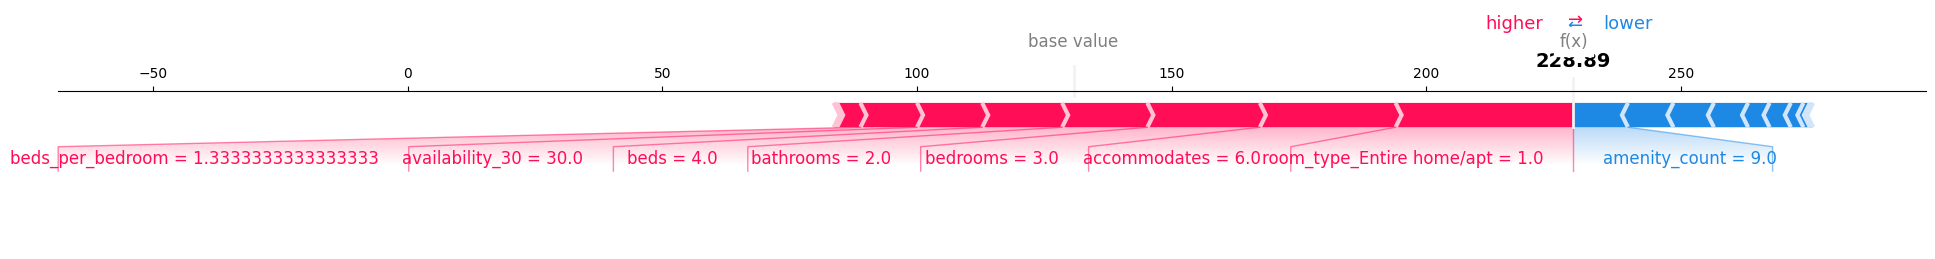

In [22]:
import numpy as np
import shap
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

low_price_index = 355
high_price_index = 891

low_price_sample = X_test.iloc[low_price_index]
high_price_sample = X_test.iloc[high_price_index]

# 4. Lấy URL hình ảnh từ dataset gốc
low_price_index_original = X_test.index[low_price_index]
high_price_index_original = X_test.index[high_price_index]
low_price_picture_url = airbnb_data_1.loc[low_price_index_original, 'picture_url']
high_price_picture_url = airbnb_data_1.loc[high_price_index_original, 'picture_url']

# 5. Tải ảnh từ URL
def load_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

low_price_image = load_image(low_price_picture_url)
high_price_image = load_image(high_price_picture_url)

# Hàm tạo thông tin từ các đặc trưng (giới hạn 5 thông tin đầu tiên)
def create_info_text(sample, limit=5):
    items = list(sample.items())  # Lấy tất cả các cặp key-value
    info_lines = [f"{key}: {value}" for key, value in items[:limit]]  # Lấy tối đa 5 thông tin
    if len(items) > limit:
        info_lines.append("...")  # Thêm "..." nếu còn thông tin khác
    return "\n".join(info_lines)
    
# 6. Hiển thị đồ thị SHAP và ảnh bên cạnh
def plot_shap_with_image(shap_values, sample, image, title, text):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Một hàng, hai cột

    # Hiển thị hình ảnh và thông tin
    axes[0].imshow(image)
    axes[0].axis("off")  # Tắt trục
    axes[0].set_title(title)
    axes[1].text(
        0.1, 0.5, text,
        fontsize=12, va="center", ha="left",
        bbox=dict(boxstyle="round", facecolor="white", edgecolor="black")
    )
    axes[1].axis("off")

    # Vẽ đồ thị SHAP force plot
    shap.force_plot(
        explainer.expected_value,
        shap_values.values,
        sample,
        matplotlib=True,
        show=False
    )

    plt.tight_layout()
    plt.show()

# 7. Hiển thị mẫu giá thấp
plot_shap_with_image(
    shap_values[low_price_index],
    low_price_sample,
    low_price_image,
    "Low Price",
    create_info_text(low_price_sample)
)

# 8. Hiển thị mẫu giá cao
plot_shap_with_image(
    shap_values[high_price_index],
    high_price_sample,
    high_price_image,
    "High Price",
    create_info_text(high_price_sample)

)

In [23]:
# print(low_price_sample)
# print(high_price_sample)

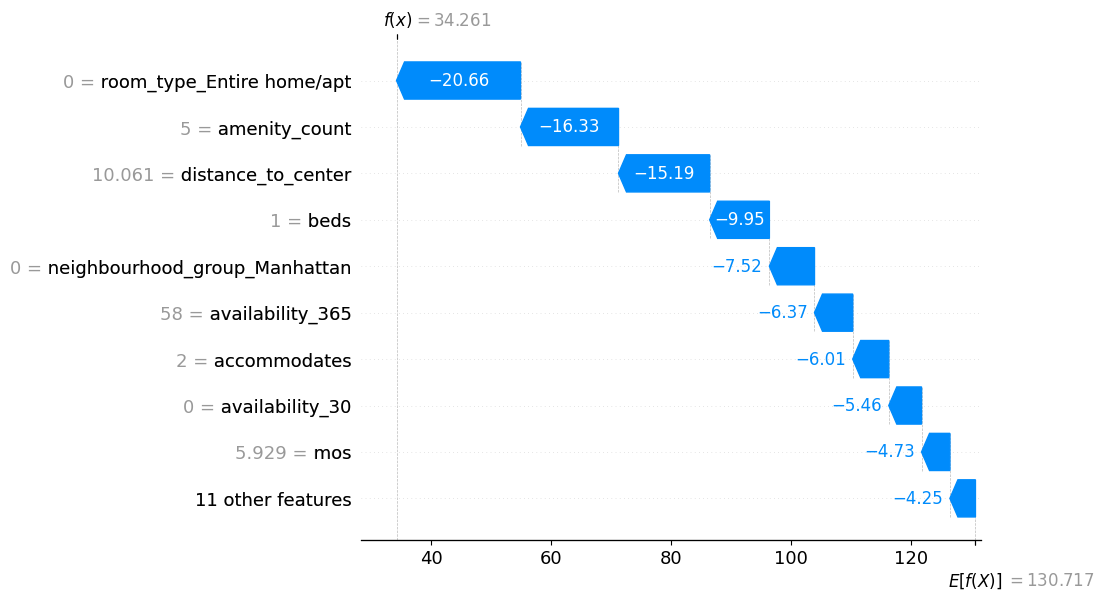

In [24]:
shap.plots.waterfall(shap_values[low_price_index])


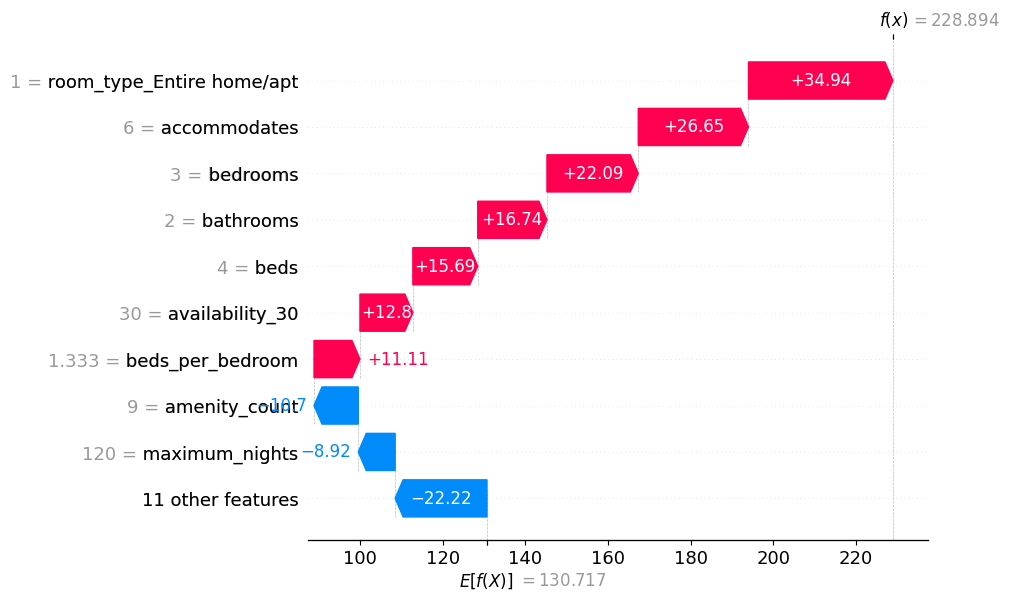

In [25]:
shap.plots.waterfall(shap_values[high_price_index])


In [26]:
# Lấy chỉ số gốc (index) của các căn phòng trong dataset ban đầu
low_price_index_original = X_test.index[low_price_index]  # Index gốc của căn phòng giá thấp vừa vừa
high_price_index_original = X_test.index[high_price_index]  # Index gốc của căn phòng giá cao vừa vừa

# Truy xuất URL hình ảnh từ dataset ban đầu
low_price_picture_url = airbnb_data_1.loc[low_price_index_original, 'picture_url']  # URL hình ảnh của căn phòng giá thấp
high_price_picture_url = airbnb_data_1.loc[high_price_index_original, 'picture_url']  # URL hình ảnh của căn phòng giá cao

# In ra URL hình ảnh
print(f"Picture URL for mid-low price room: {low_price_picture_url}")
print(f"Picture URL for mid-high price room: {high_price_picture_url}")

Picture URL for mid-low price room: https://a0.muscache.com/pictures/391fb7af-6b11-42ef-a17a-2015280b1f96.jpg
Picture URL for mid-high price room: https://a0.muscache.com/pictures/hosting/Hosting-885741019242581636/original/210e0d0b-d1ed-41c1-988b-e013d1e05cfb.jpeg


In [27]:
# print(low_price_index)

In [28]:
# print(high_price_index)